This notebook implements some work from Yang et al 2023 "A Parametric Model for Self-Interacting Dark Matter Halos".
 (https://arxiv.org/abs/2305.16176)

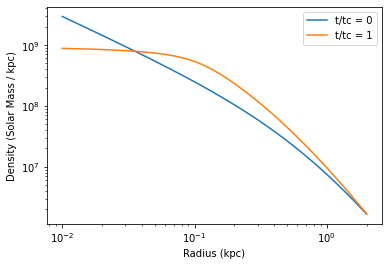

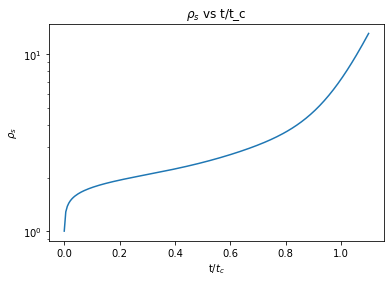

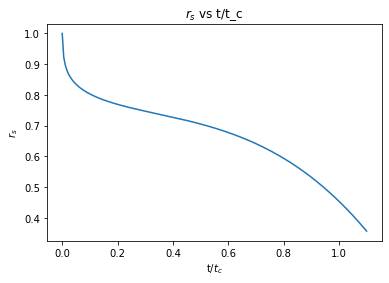

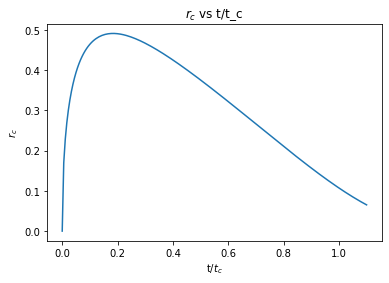

In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import M_sun, G
import matplotlib.pyplot as plt

rho_s0 = 3*1e7 * u.M_sun / u.kpc**3
r_s0 = 1 * u.kpc
r_c0 = 1 * u.kpc
beta = 4
C = 0.75
cross_section = 7.1 * u.cm**2 / u.g
#t_c = (150/C) * (1/(cross_section * ))

def universal_dens(r, t): # takes in radius (kpc) and dimensionless time variable (t is actually t/t_c)

    rho_s = (2.033 + 0.7381*t + 7.264*t**5 - 12.73*t**7 + 9.915*t**9 + (1-2.033)*(np.log(0.001))**(-1)*np.log(t + 0.001))*rho_s0
    r_s = (0.7178 - 0.1026*t + 0.2474*t**2 - 0.4079*t**3 + (1-0.7178)*(np.log(0.001)**(-1))*(np.log(t+0.001))) * r_s0
    r_c = (2.555*np.sqrt(t) - 3.632*t + 2.131*t**2 - 1.415*t**3 + 0.4683*t**4) * r_c0


    # print(- (np.log(0.001))**(-1)*np.log(t + 0.001))
    denominator = (r**beta + r_c**beta)**(1/beta) * (1 + r/r_s)**2 / (r_s)
    return rho_s / denominator


def circular_velocity(r, mass_func): # Mass_func should return the total enclosed mass at radius r
    return G * mass_func(r) / r

def rho_s(t):
    return 2.033 + 0.7381*t + 7.264*t**5 - 12.73*t**7 + 9.915*t**9 + (1-2.033)*(np.log(0.001))**(-1)*np.log(t + 0.001)

def r_s(t):
    return 0.7178 - 0.1026*t + 0.2474*t**2 - 0.4079*t**3 + (1-0.7178)*(np.log(0.001)**(-1))*(np.log(t+0.001))

def r_c(t):
    return 2.555*np.sqrt(t) - 3.632*t + 2.131*t**2 - 1.415*t**3 + 0.4683*t**4


r_grid = np.linspace(0.01,2,1000) * u.kpc

plt.plot(r_grid, universal_dens(r_grid, 0))

plt.plot(r_grid, universal_dens(r_grid, 1))
plt.xlabel("Radius (kpc)")
plt.ylabel('Density (Solar Mass / kpc)')
plt.legend(["t/tc = 0", "t/tc = 1"])

plt.loglog()
plt.show()

t_grid = np.linspace(0,1.1,200)

plt.plot(t_grid, rho_s(t_grid))
plt.title(r'$\rho_s$ vs t/t_c')
plt.yscale('log')
plt.xlabel(r"t/$t_c$")
plt.ylabel(r"$\rho_s$")

plt.show()

plt.plot(t_grid, r_s(t_grid))
plt.title(r'$r_s$ vs t/t_c')

plt.xlabel(r"t/$t_c$")
plt.ylabel(r"$r_s$")

plt.show()

plt.plot(t_grid, r_c(t_grid))
plt.title(r'$r_c$ vs t/t_c')
plt.xlabel(r"t/$t_c$")
plt.ylabel(r"$r_c$")
plt.show()



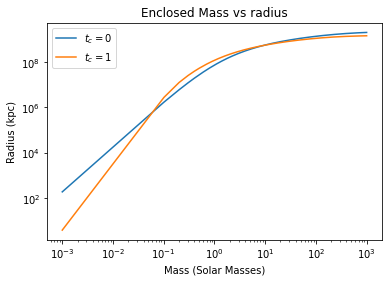

In [2]:
from scipy.integrate import trapezoid

r_grid = np.linspace(0.001, 1000, 10000) * u.kpc

def enclosed_mass(r, t):
    r_grid = np.linspace(0.0001,r.value, 200)*u.kpc
    mass_r = trapezoid(4*np.pi*r_grid**2 * universal_dens(r_grid, t), r_grid).to(u.M_sun)
    return mass_r


mass_array_0 = []
for i in range(len(r_grid)):
    mass_array_0.append(enclosed_mass(r_grid[i],0).value)
mass_array = np.array(mass_array_0) * u.M_sun

mass_array_1 = []
for i in range(len(r_grid)):
    mass_array_1.append(enclosed_mass(r_grid[i],1).value)
mass_array = np.array(mass_array_1) * u.M_sun

plt.plot(r_grid, mass_array_0)
plt.plot(r_grid,mass_array_1)
plt.ylabel('Mass (Solar Masses)')
plt.xlabel('Radius (kpc)')
plt.title('Enclosed Mass vs radius')
plt.legend([r'$t_c = 0$', r'$t_c = 1$'])
#plt.plot(r_grid, enclosed_mass(r_grid, 0.5))
plt.loglog()
plt.show()


